#Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning
Miguel Ángel Pérez López A01750145

# Problema
Clasificar un dataset de 50,000 imágenes en 10 categorías

# Importamos las librerías

In [ ]:
import keras
import numpy as np
import pandas as pd
from keras import regularizers
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow

# Cargar el dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Los labels son:
0	airplane \
1	automobile \
2	bird \
3	cat \
4	deer \
5	dog \
6	frog \
7	horse \
8	ship \
9	truck \

Validamos que el shape del dataset sea correcto

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


# Separamos el dataset de train en train y validation

*   Elemento de la lista

*   Elemento de la lista

*   Elemento de la lista
*   Elemento de la lista


*   Elemento de la lista


*   Elemento de la lista


El conjunto de validación se pasará como parámetro en el método fit

In [ ]:
from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=.1,stratify = train_labels)

Verificamos que las dimensiones sean correctas

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(validation_images.shape)
print(validation_labels.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


In [ ]:
# Convertimos las imágenes a tipo float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
validation_images = validation_images.astype('float32')

# Dividimos entre 255 para que los valores estén entre 0 y 1
train_images = train_images / 255
test_images = test_images / 255 
validation_images = validation_images / 255

# Le aplicamos one hot encoding a los labels
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
validation_labels = np_utils.to_categorical(validation_labels, num_classes)

# Definimos las capas de la red

1er iteración \
Para esta iteración incluí varias capas de maxpooling, en este caso ya no se podías poner más de esas porque las dimensiones se reducirían a menos de 1 y eso es un error. \

Esta primera iteración sólo fue para probar una red convolucional básica

In [ ]:
model  = Sequential([
  Conv2D(64, kernel_size=3, activation="relu", input_shape=train_images[0].shape),
  Conv2D(64, kernel_size=3, activation="relu", input_shape=train_images[0].shape),
  MaxPooling2D((2, 2)),
  Conv2D(128, (2, 2), activation='relu'),
  Conv2D(128, (2, 2), activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(128, (2,2), activation='relu'),
  Conv2D(128, (2,2), activation='relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.2),
  Flatten(),
  Dense(1000, activation='relu'),
  Dropout(0.2),
  Dense(500, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 128)       32896     
                                                                 
 conv2d_43 (Conv2D)          (None, 12, 12, 128)       65664     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_images, train_labels, epochs=25,
                      validation_data=(validation_images, validation_labels))

Epoch 1/25
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6632 - accuracy: 0.3805 - val_loss: 1.2826 - val_accuracy: 0.5380
Epoch 2/25
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2533 - accuracy: 0.5491 - val_loss: 1.1087 - val_accuracy: 0.6096
Epoch 3/25
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0753 - accuracy: 0.6190 - val_loss: 0.9991 - val_accuracy: 0.6370
Epoch 4/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9622 - accuracy: 0.6624 - val_loss: 0.8988 - val_accuracy: 0.6876
Epoch 5/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.8744 - accuracy: 0.6917 - val_loss: 0.8441 - val_accuracy: 0.7044
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7950 - accuracy: 0.7204 - val_loss: 0.9369 - val_accuracy: 0.6760
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7385 - accuracy: 0.7400 - val_loss: 0.8003 - val_ac

El accuracy es decente pero el validation accuracy es muy bajo. \
Un incremento de capas puede hacer que mejore.

2da iteración
Agregué más capas convolucionales para ayudar a la red a que detecte más patrones. \
Además agregué capas después del Flatten para que la red sea más profunda.


In [ ]:
model  = Sequential([
  Conv2D(32, kernel_size=4, padding='same', activation="relu", input_shape=train_images[0].shape),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), padding='same', activation='relu'),
  Conv2D(64, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(128, (3,3), padding='same', activation='relu'),
  Conv2D(128, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(256, (3,3), padding='same', activation="relu"),
  MaxPooling2D(pool_size=2),
  
  Flatten(),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        1568      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1407/1407 [==============================] - 10s 6ms/step - loss: 1.8242 - accuracy: 0.3052 - val_loss: 1.5007 - val_accuracy: 0.4208
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3818 - accuracy: 0.4947 - val_loss: 1.2344 - val_accuracy: 0.5558
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1324 - accuracy: 0.5973 - val_loss: 1.0172 - val_accuracy: 0.6462
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9808 - accuracy: 0.6529 - val_loss: 0.9744 - val_accuracy: 0.6580
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8670 - accuracy: 0.6966 - val_loss: 0.9549 - val_accuracy: 0.6726
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7752 - accuracy: 0.7291 - val_loss: 0.8907 - val_accuracy: 0.6910
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6946 - accuracy: 0.7596 - val_loss: 0.8592 - val_accuracy

El accuracy del conjunto de validación es muy bajo y el error fue demasiado alto, incluso mayor que la primer iteración. \
Después de correrlo varias veces se infiere que es por la red y no por los pesos aleatorios.

3ra iteración

Agregué más capas de convolución y reduje la cantidad de capas después del Flatten

In [ ]:
model  = Sequential([
    Conv2D(64, (3, 3), padding='same', activation="relu", input_shape=train_images[0].shape),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    
    Conv2D(8, (3,3), padding='same', activation="relu"),
    Conv2D(8, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 8)        32        
 hNormalization)                                                 
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 16)       

Compilamos el modelo

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Corremos el modelo final

In [ ]:
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(validation_images, validation_labels))

Epoch 1/25
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6750 - accuracy: 0.3828 - val_loss: 1.4272 - val_accuracy: 0.4824
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2887 - accuracy: 0.5406 - val_loss: 1.1963 - val_accuracy: 0.5800
Epoch 3/25
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0883 - accuracy: 0.6188 - val_loss: 0.9911 - val_accuracy: 0.6536
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9795 - accuracy: 0.6619 - val_loss: 0.8541 - val_accuracy: 0.7056
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8937 - accuracy: 0.6912 - val_loss: 0.9325 - val_accuracy: 0.6866
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8485 - accuracy: 0.7083 - val_loss: 0.8408 - val_accuracy: 0.7078
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7999 - accuracy: 0.7233 - val_loss: 0.8828 - val_ac

In [ ]:
# Cargamos el history del modelo en un dataframe
frame = pd.DataFrame(history.history)

In [ ]:
frame

,loss,accuracy,val_loss,val_accuracy
0,1.674970,0.382844,1.427196,0.4824
1,1.288694,0.540600,1.196314,0.5800
2,1.088288,0.618822,0.991145,0.6536
3,0.979544,0.661867,0.854111,0.7056
4,0.893746,0.691178,0.932534,0.6866
5,0.848479,0.708333,0.840829,0.7078
6,0.799902,0.723289,0.882818,0.7060
7,0.768156,0.735400,0.858906,0.7016
8,0.730043,0.746378,0.815716,0.7226
9,0.695222,0.759956,0.760703,0.7370


Como se puede observar la 3ra iteración tuvo el mejor accuracy con un loss menor.

# Accuracy vs Epochs

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

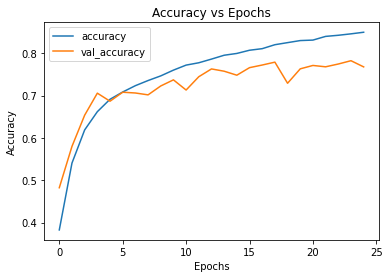

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y=["accuracy", "val_accuracy"], title="Accuracy vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

# Loss vs Epochs

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

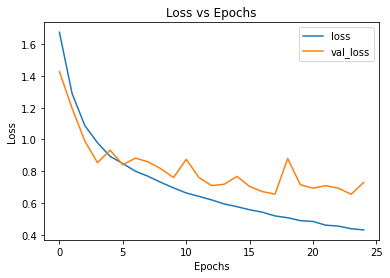

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y=["loss", "val_loss"], title = "Loss vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# Evaluamos el modelo

In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    loss, accuracy = model.evaluate(scaled_test_images, test_labels)
    return (loss, accuracy)

In [ ]:
test_loss, test_accuracy = evaluate_model(model, test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.7525 - accuracy: 0.7660
Test loss: 0.7524512410163879
Test accuracy: 0.765999972820282


# Predicciones

In [ ]:
labels_dict = {
    0:	"airplane",
    1:	"automobile",
    2:	"bird",
    3:	"cat",
    4:	"deer",
    5:	"dog",
    6:	"frog",
    7:	"horse",
    8:	"ship",
    9:	"truck"
}

1/1 [==============================] - 0s 143ms/step


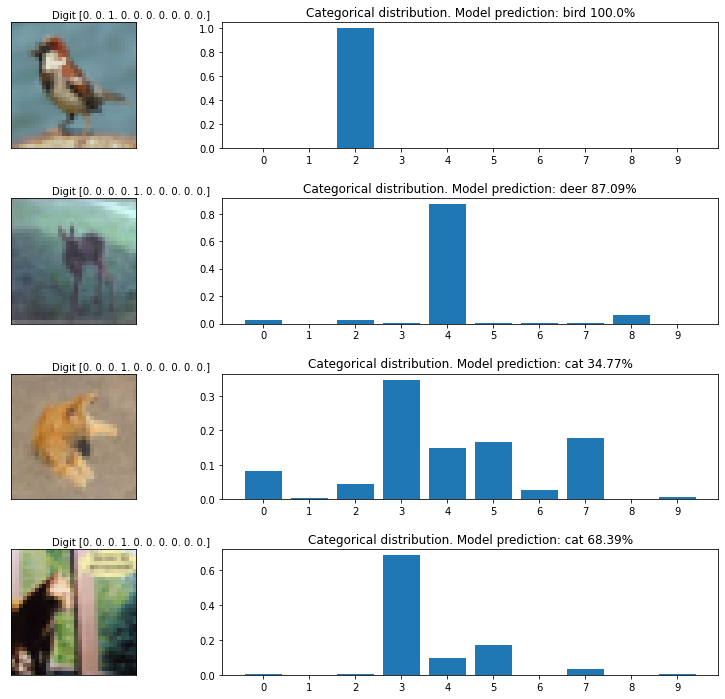

In [ ]:
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    max_probability = np.argmax(prediction)
    probability = np.round(prediction[max_probability]*100,2)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {labels_dict[max_probability]} {probability}%")
    
plt.show()

# Función para probar el modelo

In [ ]:
def predict_image(image_path):
  image = cv2.imread(image_path)
  cv2_imshow(image)
  image = cv2.resize(image,(32,32), cv2.INTER_NEAREST)
  image = np.expand_dims(image,axis=0)
  prediction = model.predict(image)[0]
  max_probability = np.argmax(prediction)
  probability = np.round(prediction[max_probability] * 100, 2)
  print("Probability: ",probability)
  print("Result:", labels_dict[max_probability])

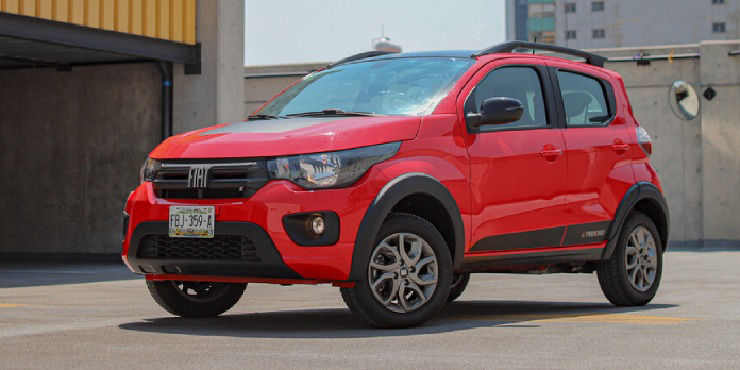

1/1 [==============================] - 0s 157ms/step
Probability:  100.0
Result: automobile


In [ ]:
predict_image("carro1.jpg")

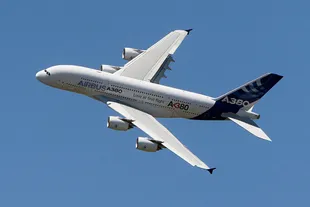

1/1 [==============================] - 0s 18ms/step
Probability:  100.0
Result: airplane


In [ ]:
predict_image("avion1.jpg")

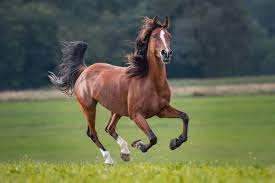

1/1 [==============================] - 0s 15ms/step
Probability:  100.0
Result: horse


In [ ]:
predict_image("caballo1.jpg")